In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

#### Функция для нахождения матрицы конечных разностей

In [4]:
def fin_dif_matrix(x_list, y_list):
    n = len(x_list)
    m = np.zeros((n, n+1))
    for i in range(n):
        m[i, 0] = y_list[i]
        m[i, 1] = x_list[i]
        m[i] = m[i].T
    for j in range(1, n):
        for i in range(n-j):
            m[i, j+1] = m[i+1, j] - m[i, j]
    return m

#### Функция для нахождения факториала

In [5]:
def fact(n):
    fact = [1]
    for x in range(1, n+1):
        fact.append(x*fact[-1])
    return fact[1:]

#### Функция для нахождения коэффициентов t для первой интерполяционной формулы

In [6]:
def coef_t_f1(n, t):
    t_coeff = [t]
    for i in range(1, n):
        t_coeff.append(t_coeff[-1]*(t-i))
    return t_coeff

#### Функция, которая находит значение переменной на отрезке первой интерполяционной формулой Ньютона

In [16]:
def form_1(x, m, polynom, h):
    x0 = m[0, 0]
    f = m[0, 1]
    factorial = fact(polynom)
    t_coeff = coef_t_f1(polynom, (x-x0)/h)
    for i in range(1, polynom):
        f += t_coeff[i-1] * ((m[0, i+1])/factorial[i-1])
    return f

#### Функция нахождения погрешности

In [17]:
def R_1(m, x, h, polynom):
    x0 = m[0, 0]
    t_coeff = coef_t_f1(polynom-1, (x-x0)/h)
    factorial = fact(polynom)
    return ((m[0, polynom])*(t_coeff[-1]))/(factorial[-1])

#### Входные параметры функции и две степени полинома - 4 и 8

In [14]:
x_list = [7.0, 7.2, 7.4, 7.6, 7.8, 8.0, 8.2, 8.4]
y_list = [1.9459, 1.9741, 2.0015, 2.0281, 2.0541, 2.0794, 2.1041, 2.1282]
x1, x2 = 6.99, 8.415
polynom4, polynom8, h = 4, 8, 0.2

m = fin_dif_matrix(y_list, x_list)

#### Нахождение значения в точке х_1

In [18]:
y1_f1_4 = form_1(x1, m, polynom4, h)
y1_f1_8 = form_1(x1, m, polynom8, h)
print(f"polynom = {polynom4}:")
print(f"F({x1}) = {y1_f1_4}")
print(f"polynom = {polynom8}:")
print(f"F({x1}) = {y1_f1_8}")

polynom = 4:
F(6.99) = 1.944469
polynom = 8:
F(6.99) = 1.9445011056252013



#### Нахождение значения в точке х_2

In [19]:
y2_f1_4 = form_1(x2, m, polynom4, h)
y2_f1_8 = form_1(x2, m, polynom8, h)
print(f"polynom = {polynom4}:")
print(f"F({x2}) = {y2_f1_4}")
print(f"polynom = {polynom8}:")
print(f"F({x2}) = {y2_f1_8}")

polynom = 4:
F(8.415) = 2.1282227499999857
polynom = 8:
F(8.415) = 2.129941024568894


#### Погрешность для х_1

In [20]:
r1_f1_4 = R_1(m, x1, h, polynom4)
r1_f1_8 = R_1(m, x1, h, polynom8)
print(f"polynom = {polynom4}:")
print(f"R({x1}) = {r1_f1_4}")
print(f"F({x1}) = {round(y1_f1_4, 6)} ± {round(r1_f1_4, 6)}\n")
print(f"polynom = {polynom8}:")
print(f"R({x1}) = {r1_f1_8}")
print(f"F({x1}) = {round(y1_f1_8, 6)} ± {round(r1_f1_8, 6)}")

polynom = 4:
R(6.99) = 1.991462550421329e-18
F(6.99) = 1.944469 ± 0.0

polynom = 8:
R(6.99) = 1.8132878913634422e-06
F(6.99) = 1.944501 ± 2e-06


#### Погрешность для х_2

In [21]:
r2_f1_4 = R_1(m, x2, h, polynom4)
r2_f1_8 = R_1(m, x2, h, polynom8)
print(f"polynom = {polynom4}:")
print(f"R({x2}) = {r2_f1_4}")
print(f"F({x2}) = {round(y2_f1_4, 6)} ± {round(r2_f1_4, 6)}\n")
print(f"polynom = {polynom8}:")
print(f"R({x2}) = {r2_f1_8}")
print(f"F({x2}) = {round(y2_f1_8, 6)} ± {round(r2_f1_8, 6)}")

polynom = 4:
R(8.415) = -4.036154223341351e-15
F(8.415) = 2.128223 ± -0.0

polynom = 8:
R(8.415) = -0.0002721824087784895
F(8.415) = 2.129941 ± -0.000272


#### Графики интерполированных функций

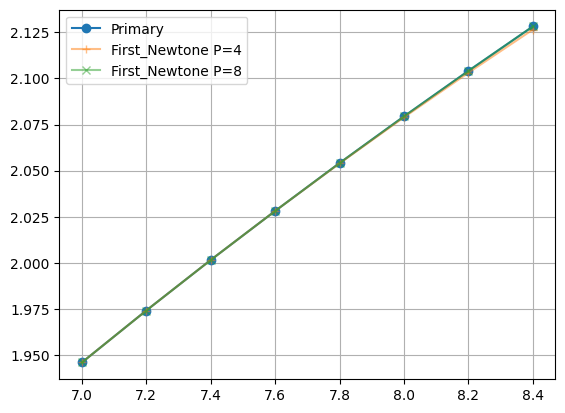

In [23]:
plt.plot(x_list, y_list, 'o-', label='Primary')
plt.plot(x_list, [form_1(x, m, polynom4, h) for x in x_list], '+-', label='First_Newtone P=4', alpha = 0.5)
plt.plot(x_list, [form_1(x, m, polynom8, h) for x in x_list], 'x-', label='First_Newtone P=8', alpha = 0.5)
plt.grid()
plt.legend()
plt.show()

#### Функция для нахождения коэффициентов 𝑡 для второй формулы Ньютона

In [33]:
def coef_t_f2(n, t):
    t_coeff = [t]
    for i in range(1, n):
        t_coeff.append(t_coeff[-1]*(t+i))
    return t_coeff

#### Функция, которая находит значение переменной на отрезке второй интерполяционной формулой Ньютона

In [34]:
def form_2(x, m, polynom, h):
    n = len(m) - 1
    xn = m[n, 0]
    f = m[n, 1]
    factorial = fact(polynom)
    t_coeff = coef_t_f2(polynom, (x-xn)/h)
    for i in range(1, polynom):
        f += t_coeff[i-1] * ((m[n-i, i+1])/factorial[i-1])
    return f

#### Погрешность для второй интерполяционной формулы

In [35]:
def R_2(m, x, h, polynom):
    n = len(m) - 1
    x0 = m[n, 0]
    t_coeff = coef_t_f2(n, (x-x0)/h)
    factorial = fact(n+1)
    return ((m[n-polynom, polynom])*(t_coeff[-1]))/(factorial[-1])

#### Нахождение значения в точке 𝑥_1

In [36]:
y1_f2_4 = form_2(x1, m, polynom4, h)
y1_f2_8 = form_2(x1, m, polynom8, h)
print(f"polynom = {polynom4}:")
print(f"F({x1}) = {y1_f2_4}")
print(f"polynom = {polynom8}:")
print(f"F({x1}) = {y1_f2_8}")

polynom = 4:
F(6.99) = 1.9454992499999773
polynom = 8:
F(6.99) = 1.944501105625201


#### Нахождение значения в точке 𝑥_2

In [37]:
y2_f2_4 = form_2(x2, m, polynom4, h)
y2_f2_8 = form_2(x2, m, polynom8, h)
print(f"polynom = {polynom4}:")
print(f"F({x2}) = {y2_f2_4}")
print(f"polynom = {polynom8}:")
print(f"F({x2}) = {y2_f2_8}")

polynom = 4:
F(8.415) = 2.1299833125000003
polynom = 8:
F(8.415) = 2.129941024568894


#### Погрешность для х_1

In [38]:
r1_f2_4 = R_2(m, x1, h, polynom4)
r1_f2_8 = R_2(m, x1, h, 6)
print(f"polynom = {polynom4}:")
print(f"R({x1}) = {r1_f2_4}")
print(f"F({x1}) = {round(y1_f2_4, 6)} ± {round(r1_f2_4, 6)}\n")
print(f"polynom = {polynom8}:")
print(f"R({x1}) = {r1_f2_8}")
print(f"F({x1}) = {round(y1_f2_8, 6)} ± {round(r1_f2_8, 6)}")

polynom = 4:
R(6.99) = -1.4204088482266727e-05
F(6.99) = 1.945499 ± -1.4e-05

polynom = 8:
R(6.99) = -7.102044241177518e-05
F(6.99) = 1.944501 ± -7.1e-05


#### Погрешность для х_2

In [39]:
r2_f2_4 = R_2(m, x2, h, polynom4)
r2_f2_8 = R_2(m, x2, h, polynom8)
print(f"polynom = {polynom4}:")
print(f"R({x2}) = {r2_f2_4}")
print(f"F({x2}) = {round(y2_f2_4, 6)} ± {round(r2_f2_4, 6)}\n")
print(f"polynom = {polynom8}:")
print(f"R({x2}) = {r2_f2_8}")
print(f"F({x2}) = {round(y2_f2_8, 6)} ± {round(r2_f2_8, 6)}")

polynom = 4:
R(8.415) = 1.6029588267192113e-07
F(8.415) = 2.129983 ± 0.0

polynom = 8:
R(8.415) = 0.0
F(8.415) = 2.129941 ± 0.0


#### Графики интерполированных функций

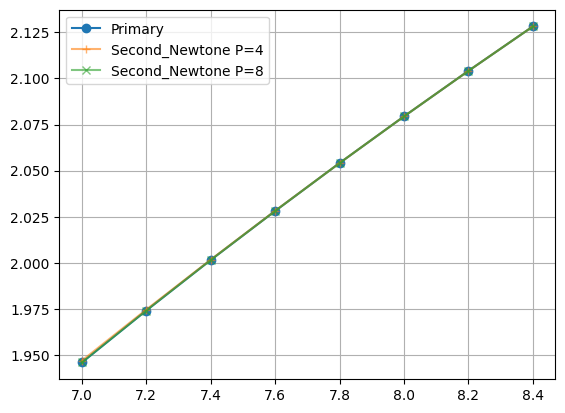

In [43]:
plt.plot(x_list, y_list, 'o-', label='Primary')
plt.plot(x_list, [form_2(x, m, polynom4, h) for x in x_list], '+-', label='Second_Newtone P=4', alpha = 0.6)
plt.plot(x_list, [form_2(x, m, polynom8, h) for x in x_list], 'x-', label='Second_Newtone P=8', alpha = 0.6)
plt.grid()
plt.legend()
plt.show()

#### Обучим полином лагранжа и построим его график

In [44]:
f_l = interpolate.lagrange(x_list, y_list)
f_l_y1, f_l_y2 = f_l(x1), f_l(x2)
print(f"F({x1}) = {f_l_y1}")
print(f"F({x2}) = {f_l_y2}")

F(6.99) = 1.9445034390082583
F(8.415) = 2.1299487399228383


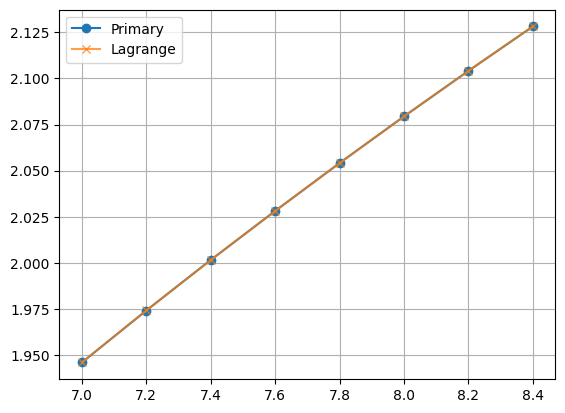

In [45]:
plt.plot(x_list, y_list, 'o-', label='Primary')
plt.plot(x_list, [f_l(x) for x in x_list], 'x-', label='Lagrange', alpha = 0.75)
plt.grid()
plt.legend()
plt.show()